<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [5]:
import CMGDB

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, Matern
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import numpy as np
import math
import csv
import pandas as pd

In [2]:
# Define a Gaussian process
def GP(X_train, Y_train):
    # fit Gaussian Process with dataset X_train, Y_train
    kernel = RBF(0.5, (0.01, 2)) + WhiteKernel()
    gp = GaussianProcessRegressor(kernel=kernel)
    gp.fit(X_train, Y_train)
    return gp

In [6]:
# Load data from file
data = pd.read_csv('/Volumes/GoogleDrive/Shared drives/Deep Chaos/data/petals_9_params/model_dynamics.csv')
# data = np.loadtxt('PO_100.dat')
data.head(4)

,Unnamed: 0,model_id,epoch,val_loss,bias_0,bias_1,bias_2,kernel_0,kernel_1,kernel_2,kernel_3,kernel_4,kernel_5
0,model.8-47-0.37.hdf5,model.8,47,0.37,-0.213560,0.372687,-0.389100,-0.879271,0.412496,1.065416,-1.090442,-0.298299,1.049835
1,model.15-30-1.08.hdf5,model.15,30,1.08,-0.037759,0.067944,-0.008640,-0.940356,-0.572191,-0.357591,0.096327,0.009308,-0.448859
2,model.15-39-0.94.hdf5,model.15,39,0.94,-0.042164,0.069088,-0.005596,-1.036220,-0.538050,-0.264442,0.002151,-0.000308,-0.351811
3,model.13-24-1.05.hdf5,model.13,24,1.05,0.037758,-0.064688,0.034898,0.101871,0.821453,0.627956,-0.579669,0.293350,-0.712462


In [11]:
print(data.columns)
print(data['epoch'].max())

Index(['Unnamed: 0', 'model_id', 'epoch', 'val_loss', 'bias_0', 'bias_1',
       'bias_2', 'kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4',
       'kernel_5'],
      dtype='object')
50


In [17]:
X=data.loc[data['epoch']==1,['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4','kernel_5']].to_numpy()
Y=data.loc[data['epoch']==50,['kernel_0', 'kernel_1', 'kernel_2', 'kernel_3', 'kernel_4','kernel_5']].to_numpy()

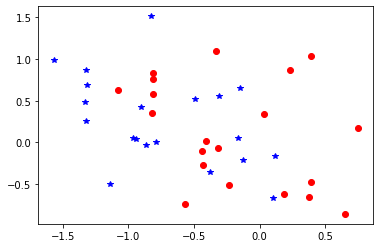

In [20]:
# Plot data
plt.plot(X[:,0], X[:,1], 'ro', Y[:,0], Y[:,1], 'b*');

In [26]:
X[0]

array([ 0.23047538,  0.8678292 , -0.04613739, -0.9656288 ,  0.9838286 ,
        0.90116692])

In [21]:
# Train a GP with the data above
gp = GP(X, Y)

In [22]:
# Use the GP to define a map F
# Notice that the GP takes lists as
# input and output, so we need to
# add the [] below
def F(X):
    return gp.predict([X])[0]

Now we can use the map F above to compute the Morse graph

In [27]:
# Define the parameters for CMGDB
lower_bounds = [data[x].min()-0.5 for x in data.columns if 'kernel' in x]
upper_bounds = [data[x].max()+0.5 for x in data.columns if 'kernel' in x]

phase_subdiv = 30

morse_fname = 'morse_sets.csv'

In [28]:
lower_bounds,upper_bounds

([-2.069939970970154,
  -1.357827365398407,
  -1.5402458906173706,
  -2.031580090522766,
  -1.6000906229019165,
  -1.5092967748641968],
 [1.2509790658950806,
  2.0141475200653076,
  2.057006359100342,
  1.4733367562294006,
  1.483828604221344,
  1.9103798866271973])

In [29]:
%%time
model = CMGDB.Model(phase_subdiv, lower_bounds, upper_bounds, F)
morse_graph, map_graph = CMGDB.ComputeMorseGraph(model)

CPU times: user 1h 32min 47s, sys: 30.2 s, total: 1h 33min 17s
Wall time: 1h 33min 14s


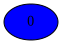

In [30]:
# Plot Morse graph
CMGDB.PlotMorseGraph(morse_graph)

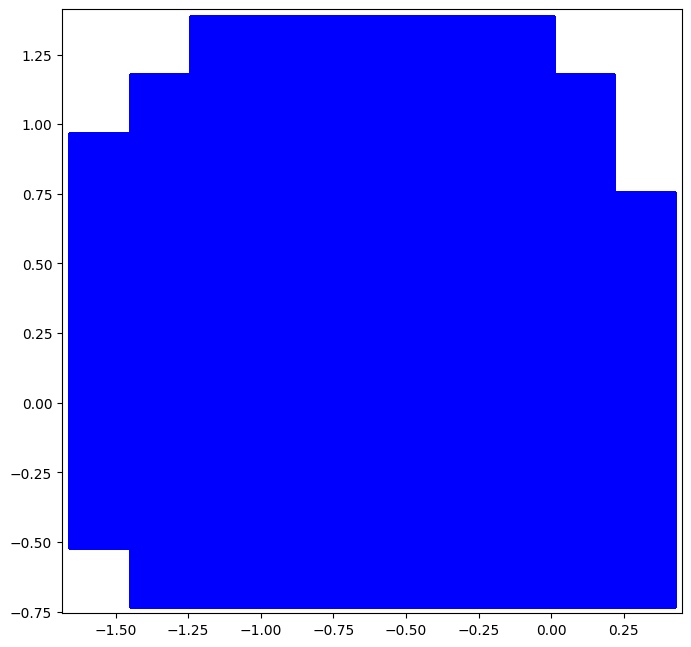

In [36]:
# Plot Morse sets
CMGDB.PlotMorseSets(morse_fname,proj_dims=[0,1])